Find Sentinel2 images taken near Landsat8 images.

In [ ]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import functions
#importlib.reload(functions)

The following code bit has been commented-out since it is computationally heavy and need to run only once to create the "cloud_overlap_perc.txt" file necessary for the next computations.

In [ ]:
# # Directory containing the .nc files
# nc_folder_path = r"E:\TESI\OpenEO\Output\SCL"
# output_file_path = r"E:\TESI\OpenEO\Output\cloud_overlap_perc.txt"

# # List all .nc files in the folder that you intend to use
# nc_files = [
#     os.path.join(nc_folder_path, "Sentinel2_SCL_2015-12-31_to_2017-12-31.nc"),
#     os.path.join(nc_folder_path, "Sentinel2_SCL_2017-12-31_to_2019-12-31.nc"),
#     os.path.join(nc_folder_path, "Sentinel2_SCL_2019-12-31_to_2021-12-31.nc"),
#     os.path.join(nc_folder_path, "Sentinel2_SCL_2021-12-31_to_2023-12-31.nc"),
#     os.path.join(nc_folder_path, "Sentinel2_SCL_2023-12-31_to_2024-12-31.nc"),
# ]

# # Function to calculate cloud coverage percentage
# def calculate_cloud_percentage(image_data):
#     cloud_mask = (image_data == 7) | (image_data == 8) | (image_data == 9) | (image_data == 10)
#     return (np.sum(cloud_mask) / image_data.size) * 100

# # Function to calculate no-data percentage
# def calculate_no_data_percentage(image_data):
#     no_data_mask = (image_data == 129)
#     return (np.sum(no_data_mask) / image_data.size) * 100

# # Initialize lists to store results
# cloud_percentage_list = []
# no_data_percentages = []
# date_list = []

# # Loop through each NetCDF file
# for nc_file_path in nc_files:
#     print(f"Processing file: {nc_file_path}")

#     # Open dataset
#     dataset = xr.open_dataset(nc_file_path)

#     # Extract SCL data and timestamps
#     scl_data = dataset['SCL']
#     time_coords = dataset['t'].values if 't' in dataset else None

#     # Process each time step
#     for i in range(scl_data.shape[0]):
#         image_data = scl_data[i, :, :].values  # Extract image data
#         cloud_percentage = calculate_cloud_percentage(image_data)
#         no_data_percentage = calculate_no_data_percentage(image_data)

#         # Store results
#         cloud_percentage_list.append(cloud_percentage)
#         no_data_percentages.append(no_data_percentage)
#         if time_coords is not None:
#             date_list.append(str(time_coords[i]))  # Convert timestamp to string

#     dataset.close()  # Close the dataset after processing

# # Write results to a text file
# with open(output_file_path, "w") as file:
#     file.write("Date, Cloud Percentage, No-Data Percentage\n")
#     for i in range(len(cloud_percentage_list)):
#         file.write(f"{date_list[i]}, {cloud_percentage_list[i]:.2f}, {no_data_percentages[i]:.2f}\n")

# print(f"Results saved to: {output_file_path}")

Here it is needed to set the maximum cloud cover and minimum overlap, all images not respecthing those values will be discarded.

In [ ]:
# File path of the cloud overlap percentage file
input_file_path = r"E:\TESI\OpenEO\Output\cloud_overlap_perc.txt"

# Initialize lists to store the extracted dates
extracted_dates = []
maxCloudCover = 3
minOverlap = 60

# Open and read the file
with open(input_file_path, "r") as file:
    lines = file.readlines()

# Skip the header and process each line
for line in lines[1:]:  # Skip the first line (header)
    date, cloud_percentage, no_data_percentage = line.strip().split(", ")
    cloud_percentage = float(cloud_percentage)
    no_data_percentage = float(no_data_percentage)

    # Check if the conditions are met
    if cloud_percentage < maxCloudCover and no_data_percentage < minOverlap:
        extracted_dates.append(date)

print(f"Number of dates with {maxCloudCover:.2f}% CC and {minOverlap}% overlap:", len(extracted_dates))

# Print the extracted dates
#print(f"Dates with CC > {maxCloudCover}% and No-Data Percentage > {minOverlap}%:")

#for date in extracted_dates:
    #print(date)

Number of dates with 3.00% CC and 60% overlap: 150


In [ ]:
deltaT = 10 #Set the maximum time delta, outside it, images will be discarded

landsat8ImagesPath = r"E:\TESI\USGS\Final_Data_Masked_4K"
landsat8ImagesDates = functions.extract_dates_from_filenames(landsat8ImagesPath)
landsat8ImagesDates_dt = [datetime.strptime(date, '%d/%m/%Y') for date in landsat8ImagesDates]
print(landsat8ImagesDates_dt)
extracted_dates_dt = [datetime.strptime(date.split('.')[0], '%Y-%m-%dT%H:%M:%S') for date in extracted_dates]
print(extracted_dates_dt)


# Function to compute the closest date difference and return a list of matching dates
def compute_closest_date_difference(landsat8ImagesDates_dt, extracted_dates_dt, deltaT):
    close_dates = []  # List to store matching dates with difference <= deltaT days
    
    for landsat_date in landsat8ImagesDates_dt:
        # Find the closest date in extracted_dates_dt by minimizing the absolute difference in days
        closest_date = min(extracted_dates_dt, key=lambda x: abs((x - landsat_date).days))
        difference_in_days = abs((closest_date - landsat_date).days)
        
        # If the difference is less than or equal to deltaT days, store the result
        if difference_in_days <= deltaT:
            close_dates.append((landsat_date, closest_date, difference_in_days))
    
    return close_dates

# Call the function with a 6-day threshold
matching_dates = compute_closest_date_difference(landsat8ImagesDates_dt, extracted_dates_dt, deltaT)

# Print the number of matching dates
print(f"Number of matching dates (difference <= {deltaT} days): {len(matching_dates)}\n")

# Print the matching dates and their differences
print("Matching dates:\n")
for landsat_date, closest_date, difference in matching_dates:
    print(f"Landsat8 Date: {landsat_date.strftime('%Y-%m-%d')}, "
          f"Closest Extracted Date: {closest_date.strftime('%Y-%m-%d')}, "
          f"Difference: {difference} days")


[datetime.datetime(2015, 7, 22, 0, 0), datetime.datetime(2015, 8, 7, 0, 0), datetime.datetime(2015, 9, 24, 0, 0), datetime.datetime(2015, 11, 27, 0, 0), datetime.datetime(2016, 3, 18, 0, 0), datetime.datetime(2016, 4, 19, 0, 0), datetime.datetime(2016, 5, 21, 0, 0), datetime.datetime(2016, 6, 22, 0, 0), datetime.datetime(2016, 8, 25, 0, 0), datetime.datetime(2016, 9, 26, 0, 0), datetime.datetime(2016, 10, 12, 0, 0), datetime.datetime(2017, 1, 16, 0, 0), datetime.datetime(2017, 2, 17, 0, 0), datetime.datetime(2017, 4, 6, 0, 0), datetime.datetime(2017, 4, 22, 0, 0), datetime.datetime(2017, 8, 12, 0, 0), datetime.datetime(2017, 10, 15, 0, 0), datetime.datetime(2017, 10, 31, 0, 0), datetime.datetime(2017, 11, 16, 0, 0), datetime.datetime(2018, 2, 4, 0, 0), datetime.datetime(2018, 2, 20, 0, 0), datetime.datetime(2018, 3, 8, 0, 0), datetime.datetime(2018, 4, 25, 0, 0), datetime.datetime(2018, 6, 28, 0, 0), datetime.datetime(2018, 7, 30, 0, 0), datetime.datetime(2018, 8, 15, 0, 0), datetime.d

The next cells are devoted to plotting the results.

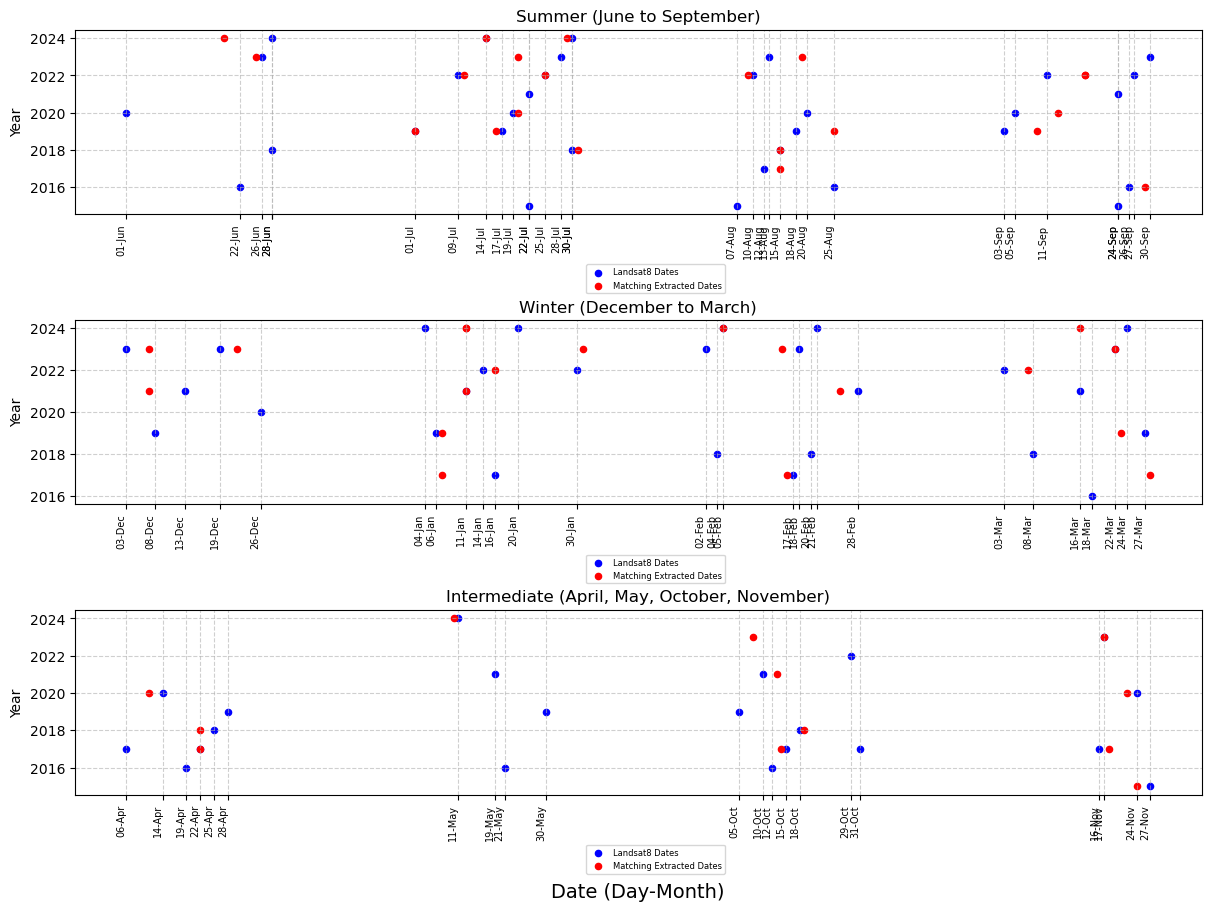

In [83]:
#import matplotlib.pyplot as plt  # Import the plotting library
#from datetime import datetime  # Import datetime for handling dates

def plot_seasonal_dates(landsat_dates, matching_dates):
    """ 
    Plots Landsat8 dates (blue) and matching extracted dates (red), categorized by season. 
    """
    # Convert matching_dates to a list of just the extracted dates (ignore the Landsat date and difference)
    matching_dates = [match[1] for match in matching_dates]

    # Function to categorize dates into three seasons
    def categorize_by_season(dates):
        """
        Categorizes dates into three seasons:
        - Summer: June to September
        - Winter: December to March
        - Intermediate: April, May, October, November
        """
        summer = [date for date in dates if date.month in [6, 7, 8, 9]]
        winter = [date for date in dates if date.month in [12, 1, 2, 3]]
        intermediate = [date for date in dates if date.month in [4, 5, 10, 11]]
        return summer, winter, intermediate

    # Categorize Landsat dates and matching dates by season
    landsat_summer, landsat_winter, landsat_intermediate = categorize_by_season(landsat_dates)
    matching_summer, matching_winter, matching_intermediate = categorize_by_season(matching_dates)

    # Helper function to plot a single season on a subplot
    def plot_single_season(ax, landsat, matching, title, rearrange_winter = False, adjust_intermediate = False):
        """
        Plots dates for a single season on the given axis.
        - Landsat dates: blue dots
        - Matching extracted dates: red dots
        """
        if not landsat and not matching:
            # If no data for this season, show "No Data" message
            ax.text(0.5, 0.5, "No Data", transform=ax.transAxes, ha='center', fontsize=14)
            return
        
        # Helper function to extract x-axis positions and years from dates
        def get_plot_data(dates, rearrange_winter = False, adjust_intermediate = False):
            """
            Calculates x-axis positions and years for each date.
            - x-axis positions are scaled based on month and day for better readability.
            """
            years = [date.year for date in dates]
            if rearrange_winter:
                # Adjust for winter: December appears before January
                x_positions = [
                    (0.9 * (date.month - 12) if date.month == 12 else 0.75 * date.month) + 1.5 * date.day / 100 #scale month and day part of the date to improve readability
                    for date in dates
                ]
            elif adjust_intermediate:
                # Custom scaling for intermediate seasons: Reduce May-October distance by 3x
                x_positions = [
                    ((date.month - 2) * 1 if date.month in [10, 11] else  # Shift October and November back
                    (date.month + 2) * 1 if date.month in [4, 5] else  # Shift April and May forward
                    date.month) + 1.5 * date.day / 100  # Keep other months as is
                    for date in dates
                ]
            else:
                x_positions = [0.8 * date.month + 1.5 * date.day / 100 for date in dates]
            return x_positions, years

        # Plot Landsat dates (blue dots)
        if landsat:
            x_landsat, y_landsat = get_plot_data(landsat, rearrange_winter, adjust_intermediate)
            ax.scatter(x_landsat, y_landsat, label="Landsat8 Dates", color="blue", s=20)
        
        # Plot matching extracted dates (red dots)
        if matching:
            x_matching, y_matching = get_plot_data(matching, rearrange_winter, adjust_intermediate)
            ax.scatter(x_matching, y_matching, label="Matching Extracted Dates", color="red", s=20)
        
        # Format x-axis with specific dates
        date_labels = [date.strftime("%d-%b") for date in landsat]  # Format: "day-month"
        ax.set_xticks(x_landsat)
        ax.set_xticklabels(date_labels, rotation=90, ha="right")
        ax.tick_params(axis='x', labelsize=7)  # Resize x-axis labels for readability

        # Format the plot
        ax.set_title(title, fontsize=12)  # Set the title of the subplot
        ax.set_ylabel("Year", fontsize=10)  # Set the y-axis label
        ax.grid(axis='both', linestyle='--', alpha=0.6)  # Add grid lines for easier reading
        ax.legend(loc='center left', bbox_to_anchor=(0.45, -0.35), fontsize = 6)  # Show legend to differentiate between blue and red dots

    # Create subplots for each season
    fig, axs = plt.subplots(3, 1, figsize=(12, 9), constrained_layout=True)

    # Plot each season on a separate subplot
    plot_single_season(axs[0], landsat_summer, matching_summer, "Summer (June to September)")
    plot_single_season(axs[1], landsat_winter, matching_winter, "Winter (December to March)", rearrange_winter=True)
    plot_single_season(axs[2], landsat_intermediate, matching_intermediate, "Intermediate (April, May, October, November)", adjust_intermediate=True)

    # Set the xlabel for the bottom plot
    axs[2].set_xlabel("Date (Day-Month)", fontsize=14, labelpad=30)
    plt.show()

plot_seasonal_dates(landsat8ImagesDates_dt, matching_dates)


In [ ]:
#matching_dates_2 = compute_closest_date_difference(landsat8ImagesDates_dt, extracted_dates_dt, deltaT)
matching_dates_2 = []
# Iterate over each date in extracted_dates_dt
for extracted_date in extracted_dates_dt:
    # Find the closest date from landsat8ImagesDates_dt
    closest_landsat_date = min(landsat8ImagesDates_dt, key=lambda x: abs((x - extracted_date).days))
    
    # Calculate the difference in days between the two dates
    difference_in_days = abs((closest_landsat_date - extracted_date).days)
    
    # Append the result as a tuple (extracted_date, closest_landsat_date, difference_in_days)
    matching_dates_2.append((extracted_date, closest_landsat_date, difference_in_days))

#print(landsat8ImagesDates_dt)
#print(extracted_dates_dt)
#print(len(matching_dates_2))
print(matching_dates_2)
# Print the result
for r in matching_dates_2:
    print(f"Extracted Date: {r[0]}, Closest Landsat Date: {r[1]}, Difference: {r[2]} days")


150
[(datetime.datetime(2015, 11, 24, 0, 0), datetime.datetime(2015, 11, 27, 0, 0), 3), (datetime.datetime(2016, 1, 13, 0, 0), datetime.datetime(2015, 11, 27, 0, 0), 47), (datetime.datetime(2016, 1, 23, 0, 0), datetime.datetime(2016, 3, 18, 0, 0), 55), (datetime.datetime(2016, 3, 3, 0, 0), datetime.datetime(2016, 3, 18, 0, 0), 15), (datetime.datetime(2016, 7, 21, 0, 0), datetime.datetime(2016, 6, 22, 0, 0), 29), (datetime.datetime(2016, 9, 9, 0, 0), datetime.datetime(2016, 8, 25, 0, 0), 15), (datetime.datetime(2016, 9, 29, 0, 0), datetime.datetime(2016, 9, 26, 0, 0), 3), (datetime.datetime(2016, 11, 8, 0, 0), datetime.datetime(2016, 10, 12, 0, 0), 27), (datetime.datetime(2016, 12, 28, 0, 0), datetime.datetime(2017, 1, 16, 0, 0), 19), (datetime.datetime(2017, 1, 7, 0, 0), datetime.datetime(2017, 1, 16, 0, 0), 9), (datetime.datetime(2017, 2, 16, 0, 0), datetime.datetime(2017, 2, 17, 0, 0), 1), (datetime.datetime(2017, 3, 28, 0, 0), datetime.datetime(2017, 4, 6, 0, 0), 9), (datetime.datet

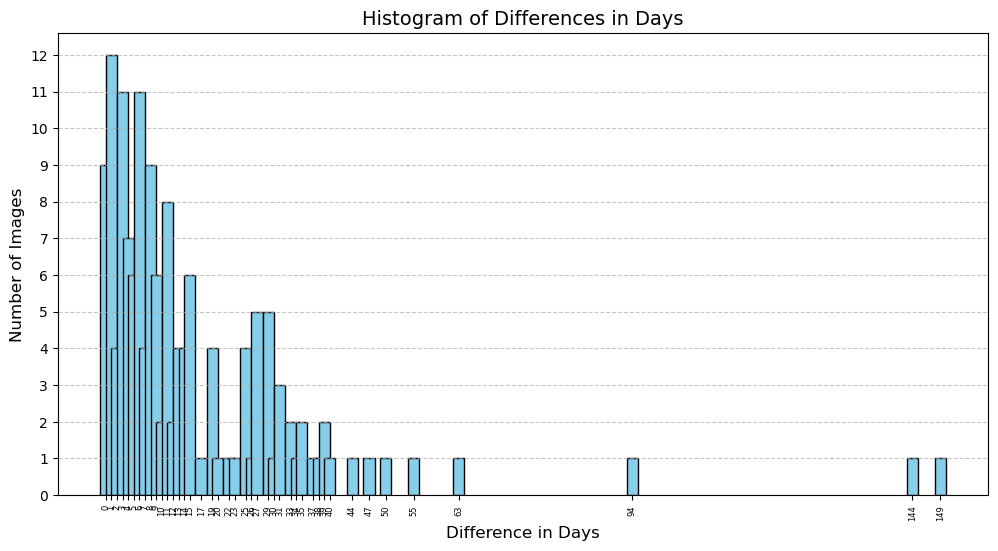

In [65]:
from collections import Counter

# Extract differences in days from matching_dates_2
differences_in_days = [item[2] for item in matching_dates_2]

# Count occurrences of each difference
difference_counts = Counter(differences_in_days)
non_zero_differences = sorted(difference_counts.keys())  # Only differences with non-zero count
counts = [difference_counts[d] for d in non_zero_differences]

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(non_zero_differences, counts, color='skyblue', edgecolor='black', width=2)  # Doubled bar width

# Customize plot
plt.xlabel("Difference in Days", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Histogram of Differences in Days", fontsize=14)
plt.xticks(non_zero_differences, fontsize=6, rotation=90)  # Reduce font size for x-axis labels

# Show all y-axis ticks (from 0 to max count with step 1)
plt.yticks(range(0, max(counts) + 1))

plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

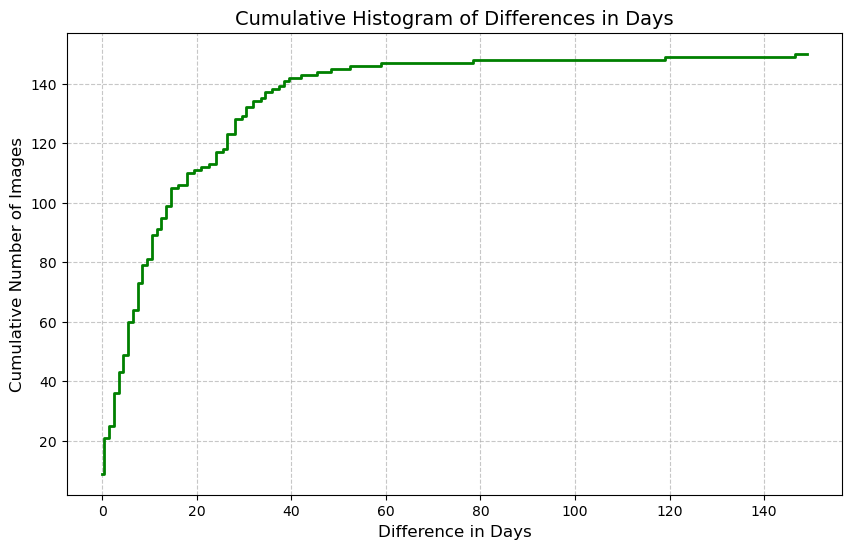

In [66]:
# Extract differences in days from matching_dates_2
differences_in_days = [item[2] for item in matching_dates_2]

# Create a sorted array of unique differences
unique_differences = sorted(set(differences_in_days))

# Compute cumulative counts
cumulative_counts = np.cumsum([differences_in_days.count(d) for d in unique_differences])

# Plot the cumulative histogram
plt.figure(figsize=(10, 6))
plt.step(unique_differences, cumulative_counts, where='mid', color='green', linewidth=2)

# Customize plot
plt.xlabel("Difference in Days", fontsize=12)
plt.ylabel("Cumulative Number of Images", fontsize=12)
plt.title("Cumulative Histogram of Differences in Days", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()